### Amber K. Lenon, Alexander H. Nitz, Duncan A. Brown
### https://arxiv.org/abs/2005.14146

In [1]:
import numpy as np
import bilby
import gwpy
import corner
import h5py
import pylab as plt
%matplotlib inline

from astropy.cosmology import Planck18
from astropy.cosmology import z_at_value
from scipy.interpolate import interp1d

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

In [2]:
f = h5py.File('tf2_e_170817v2.hdf', 'r')

In [3]:
list(f.keys())

['data', 'sampler_info', 'samples']

In [4]:
f['samples'].keys()

<KeysViewHDF5 ['delta_tc', 'distance', 'e10', 'eccentricity', 'inclination', 'logjacobian', 'loglikelihood', 'logprior', 'polarization', 'spin1z', 'spin2z', 'srcmass1', 'srcmass2']>

In [5]:
posterior = f['samples']

In [6]:
z               = np.linspace(0,1,500) # red-shift
#Dc              = Planck18.comoving_distance(z).value # co-moving distance in Mpc
luminosity_distance              = Planck18.luminosity_distance(z).value # luminosity distance in Mpc
#z_to_Dc    = interp1d( z, Dc, kind = 'cubic')
#Dc_to_z    = interp1d( Dc, z, kind = 'cubic')
#z_to_luminosity_distance    = interp1d( z, luminosity_distance, kind = 'cubic')
luminosity_distance_to_z    = interp1d( luminosity_distance, z, kind = 'cubic')

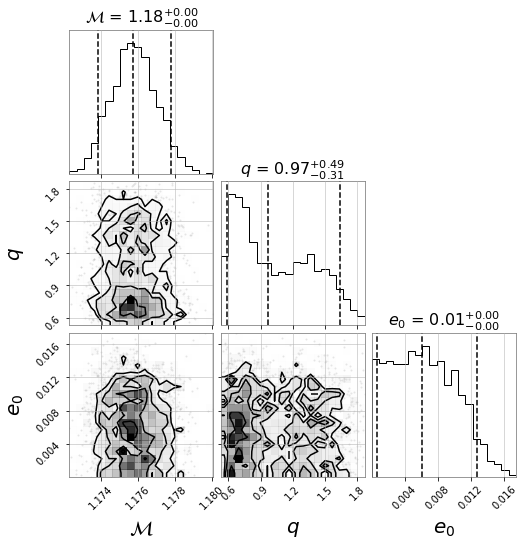

In [7]:
# TaylorF2Ecc
## minimum-frequency = 20Hz
theta_jn = posterior["inclination"]
e0 = posterior["eccentricity"]
D = posterior["distance"]

m1 = posterior["srcmass1"]
m2 = posterior["srcmass2"]

# detector frame
z = luminosity_distance_to_z(D)
mass_1 = m1/(1+z)
mass_2 = m2/(1+z)

chirp_mass = ( (mass_1*mass_2)**(3/5) )/( (mass_1+mass_2)**(1/5) )
mass_ratio = mass_2/mass_1


data = np.transpose(np.array([chirp_mass, mass_ratio,e0]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 16},label_kwargs={"fontsize": 20})
plt.savefig('GW170817_Lenon_mass.png')
plt.show()


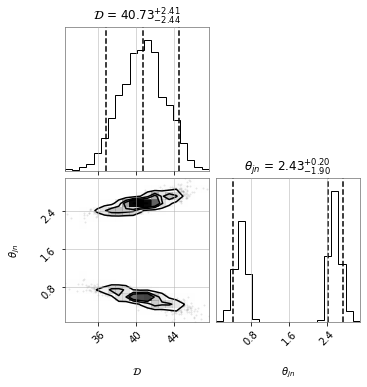

In [44]:
data = np.transpose(np.array([D,theta_jn]))
figure = corner.corner(data, labels=[r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 12})
plt.savefig('GW170817_Lenon_distance.png')
plt.show()

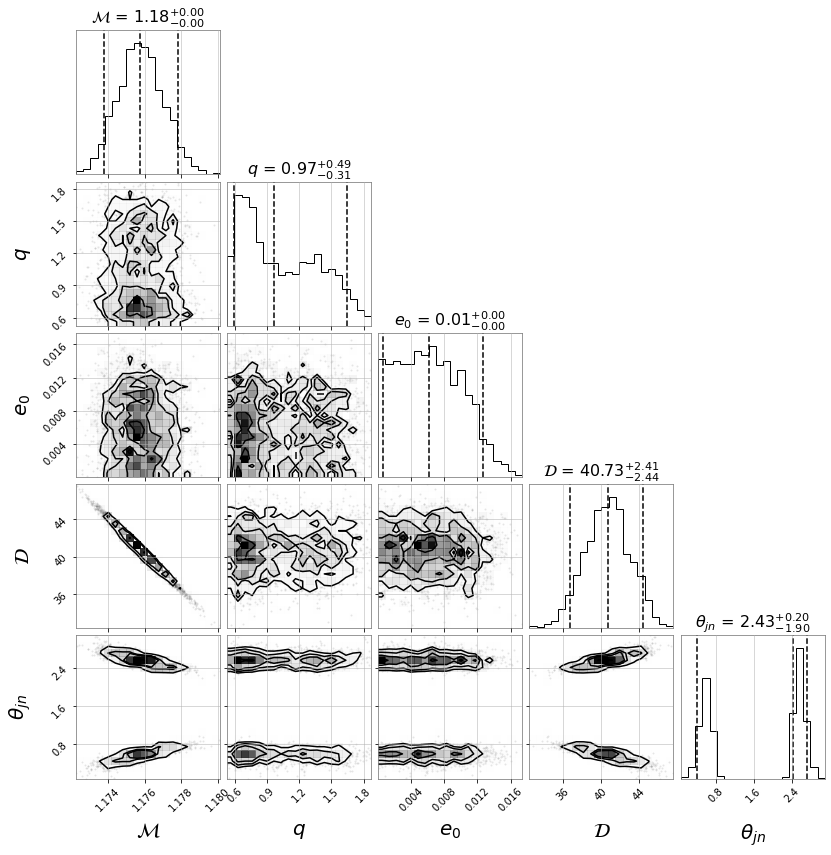

In [8]:
data = np.transpose(np.array([chirp_mass, mass_ratio,e0,D,theta_jn]))
figure = corner.corner(data, labels=[r"$\mathcal{M}$", r"$q$", r"$e_0$", r"$\mathcal{D}$", r"$\theta_{jn}$"],
                       quantiles=[0.05, 0.5, 0.95],
                       show_titles=True, title_kwargs={"fontsize": 16},label_kwargs={"fontsize": 20})
plt.savefig('GW170817_Lenon.png')
plt.show()
